#  Medical Imaging 
##  Practical session 5: Image Processing - Part II 
### Image Segmentation
###  7th December 2021
***
**Jakub Ceranka, Sebastian Amador Sanchez, Jef Vandemeulebroucke\
Department of Electronics and Informatics (ETRO)\
Vrije Universitet Brussel, Pleinlaan 2, B-1050 Brussels, Belgium**

<font color=blue>Insert students names and IDs here</font>

BARTOLI LUDOVICO 02102117 ludovico.bartoli@ugent.be

VILLA VALERIA 02102628 valeria.villa@ugent.be

## Introduction
For more information on the following concepts see the lecture recordings, course slides and the related study material.

### Purpose
The goal of this exercise session is to obtain insight in the image segmentation operations and their evaluation metrics commonly applied in medical image processing.


### BraTS dataset
You will be working with images obtained from the [*Brain Tumor Segmentation (BRATS) Challenge*](http://www.braintumorsegmentation.org), which contains the scans of multiple glioma cases. 
Gliomas are a type of brain tumor that originate in the glial cells that surround the neurons. They are characterized by having various heterogeneous histological sub-regions, resulting on them having varying intensity profiles. In consequence, to properly visualize them multimodal MRI scans have to be employed, making multimodal segmentation of brain tumors a major challenge in medical image analysis.

<img src="./images/brats.png" alt="drawing" width="800"/>

**(A)** Whole tumor visible in T2-FLAIR **(B)** Tumor core visible in T2 **(C)** Enhancing tumor (blue) and necrotic component (green) visible in T1-Contrast **(D)** Tumor sub-regions.

You DO NOT have to download the dataset, you have to employ the images acquired in the previous session. If you were not able to obtain them, these are provided within the files. 


### Instructions
The jupyter notebook should be submitted as the report by teams of two using the assignment functionality of Ufora.

Please complete this notebook and upload the following before the deadline **21th December, 2021, at 23:59**:
- the notebook in *.ipynb* format
- the executed notebook in *.html* format (File --> Download As --> HTML)

The report should contain concise answers to the questions (in specified cells), python code and plotted figures.
For this practical session, we do not require a separate written report in *.pdf* format.

#### Questions: [samadors@etrovub.be](mailto:samadors@etrovub.be)

### Required modules
Before starting make sure you have installed the following libraries:

- ```SimpleITK``` -> Read and write images, image operations
- ```numpy``` -> Operation with arrays
- ```matplotlib == 3.1.3``` -> Plot images
- ```Tkinter == 8.6``` -> GUI backend for matplotlib

# 1. Image segmentation
Image segmentation can be defined as any method that results in the partitioning of an image into meaningful regions. This is done by defining the boundaries of a region of interest, known as foreground, which has similar characteristics, such as shape, color or texture. The remaining image volume is known as the background. 

<img src="./images/segmentations.png" alt="drawing" width="600"/>

**Left:** Retinal blood vessel segmentation. **Center.** Skin cancer lesion segmentation. **Left.** CT lung segmentation.

In medical imaging, segmentation is either a preprocessing step or more importantly, a goal itself. For example, the qualitative 3D representation of an organ requires the accurate delineation or segmentation of that organ from the stack of images. Here, the segmentation is used as preprocessing step prior to visualization. In contrast, segmentation is a goal itself in qualitative or quantitative image analysis for specific diagnostic tasks, e.g. tumor size measurements in brain MRI or fetal head measurements in ultrasound.

Multiple methods exist and the optimal choice is highly dependent on the region to be segmented, and the type and quality of the image. Regardless the image modality, and according to the image features, two main apporaches can be distinguished: 
1. **Region based:** We look for uniform regions in an image
2. **Edge based:** We look for the boundaries between regions with different characteristics. 

## 1.1 Thresholding

Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more boundaries of intensity in the image histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while the others will be considered background (0). The process can be extended to multiple labels using multiple (upper and lower) boundaries.

<img src="./images/thresholding.png" alt="drawing" width="500"/>

**(i)** Original image **(ii)** Image histogram **(iii)** Too high threshold **(iv)** Too low threshold **(v)** Ideal threshold

Despite its simplicity, thresholding is sometimes the least accurate approach. Factors like image contrast, resolution and objects with varying levels of brightness can hamper the performance of thresholding.

<img src="./images/histograms.png" alt="drawing" width="500"/>

**(i)** Gray-level hisotgrams approximated by two normal distributions **(ii)** Combined histograms. See third case, where to set the threshold?

### Optimal thresholding
Thresholding can be done by manually selecting the boundaries, or automatically, by optimizing the boundary values with respect to a certain criterion. For instance, Otsu thresholding will automatically select boundaries that maximize the class variance of two or more regions.


## Exercise 1.1:

One of the first algorithms dedicated to finding an optimal threshold is the one proposed by [Otsu N](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4310076). In its simplest form it segments the image histogram in two classes: background and foreground. In this exercises you will apply the [extended version](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.85.3669&rep=rep1&type=pdf) of it to divide an image into multiple regions, and consequently segment the tumor from the MRI image. Additionally, you will get familiarized with post-processing techniques and segmentation evaluation metrics. 

1. Use ```sitk.ReadImage()``` to read both the MRI image: 'BraTS2021_01666_flair.mha', and the ground truth segmentation: 'BraTS2021_01666_seg.mha' (read the ground truth as sitk.sitkUInt8) from the folder 'BraTS2021_01666'.

2. Create a function that performs the Otsu multi-thresholding.

    **To create the function:**
    - Employ the filter [```sitk.OtsuMultipleThresholdsImageFilter```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1OtsuMultipleThresholdsImageFilter.html).  ```SetNumberOfHistogramBins ``` to 64 and ```SetNumberOfThresholds ``` to 4.
    - ```Execute()``` to get the segmented image
    - Retrieve the threshold values  using ```GetThresholds()```.
    - Return the segmented image and thresholds.
    
3. See the results using the provided function ```show_segments()```. Select the segment where the tumor is present. Since it is surrounded by unwanted components, design a function that extracts the tumor from the rest of the elements. To achieve this, search for the component with the highest number of pixels. Keep this image for exercise 1.2, display it using ```show_image```.

    **To create the function that selects the desired component:**
    - Employ [```sitk.ConnectedComponentImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ConnectedComponentImageFilter.html) to label all the components of the segmented image. Set ```SetFullyConnected()``` to True. 
    - Afterwards, use [```sitk.LabelShapeStatisticsImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelShapeStatisticsImageFilter.html) to compute the shape statistics over the resultant labeled image. 
    - Utilize ```GetNumberOfLabels()``` to obtain the number of components in the image, and use ```GetNumberOfPixels()``` to get the number of pixels per labeled component. Retrieve the element with the max number of pixels. Ignore the background, otherwise you will retrieve this element.
    - **hint:** Use ```.index()``` and ```max()``` to obtain the index of the element with the max number of pixels.

4. Post-processing. Apply the following post-processing methods to the segmentation of step 4. Display the result using ```show_image```.
    - [```sitk.BinaryFillholeImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1BinaryFillholeImageFilter.html), ```SetForegroundValue``` to 1
    - [```sitk.BinaryDilateImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1BinaryDilateImageFilter.html), ```SetForegroundValue``` to 1, ```SetKernelRadius ``` equal to 2  and ```SetKernelType``` equal to ```sitk.sitkBall()```.

5. Calcualte the DICE and Jaccard coefficient, along with the false positive error and false negative error using [```sitk.LabelOverlapMeasuresImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelOverlapMeasuresImageFilter.html). Additionally, calculate the Hausdorff distance employing [```sitk.HausdorffDistanceImageFilter()```](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1HausdorffDistanceImageFilter.html). 

    It is recommended to create a function ```evaluate()```, which takes two input arguments - binary ground truth and binary segmentation results - and returns all validation criteria at once. Keep in mind that the input for the evaluation metrics should be a binary image of type ```sitk.sitkUInt8```. If your image type has to be changed, use ```sitk.Cast()``` filter.

## Exercise 1.2:

1. Read the images you got from exercise 1 (linear stretching) and exercise 2 (denoised) from the previous session.  If you were not able to obtain them you can find these under the folder "Previous_session": 'stretched.mha' and 'median_filtered.mha'.

2. Apply the Otsu multi-thresholding algorithm to the new images. Visualize the results using ```show_segments```.

3. In each case select the segment where the tumor is distinguishable and extract it using the function of point 3 of the previous exercise. It is possible that in the selected segment the tumor is connected to other structures. 

4. Use the following 3 images: 
    - (1) the tumor mask without post-processing of exercise 1.1, 
    - (2) tumor mask obtained from the linear stretched image 
    - (3) tumor mask obtained from the denoised image. 
   
   Via a "majority voting" approach combine the images to obtain a better segmentation : 
    - Start by creating an empty 2D array with equal dimensions to one of the previous images (if needed change from ITK image to np.array using: ```sitk.GetArrayFromImage()``` and vice-versa).
    - Iterate over each pixel position of the 3 images, average the pixel values and if this is greater than 0.5, place a 1 in the same position in the 2D array.
    
5. Apply ```sitk.BinaryFillholeImageFilter``` (```SetForegroundValue``` to 1) and ```sitk.BinaryDilateImageFilter``` (```SetForegroundValue``` to 1, ```SetKernelRadius ``` to 2 and ```SetKernelType``` to ```sitk.sitkBall()```.

6. Calculate the metrics (DICE coefficient, Jaccard coefficient, false positive error, false negative error and Hausdorff distance) between the ground truth and the images from point 4 and 5.

## Report
<font color=blue> 
- Plot a one-by-five image comparison of the ground truth and the four tumor segmentations: (1) Exercise 1.1 no post-processing, (2) Exercise 1.1 post-processing, (3) Exercise 1.2 majority voting no post-processing and (4) Exercise 1.2 majority voting post-processing.
- Plot the results of each of the evaluation metric for different methods using a ```matplotlib``` barplot.
- Discuss your results. 
</font>

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Function to show a new image which is in sitk format
def show_image(image):
    '''
    This function converts a sitk image to an array and shows it
    Inputs:
        - image: Image in SimpleITK format that will be plot
    Outputs:
        - A new plot
    '''
    array = sitk.GetArrayFromImage(image)
    plt.imshow(array, cmap='gray')
    plt.show()


# Function to show the results of the multi-otsu threshold
def show_segments(original_image, segments, thresholds):
    '''
    Plot the results of the multi-threshold filter. Additionally, it shows the histogram of the image and 
    the correspondant thresholds. Additionally, it displays the resultant segments of the algorithm.
    Inputs:
        - original_image: The original image in sitk format.
        - segments: Segmented image obtained from the multi-threshold filter. Format: sitk.
        - thresholds: Numeric cut-off thresholds. Format: float.
    Outputs:
        - A plot of the original image, the resultant segments, its histogram with thresholds and each of
        the segments.
    '''
    # Pass images to arrays
    original_array = sitk.GetArrayFromImage(original_image)
    segments_array = sitk.GetArrayFromImage(segments)
    
    # Use the threshold values to generate the regions
    regions = np.digitize(original_array, bins=thresholds)
    
    # Plot
    fig3 = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = fig3.add_gridspec(4, 4)
    
    # Original image 
    f3_ax1 = fig3.add_subplot(gs[0:-2, 0:-2])
    f3_ax1.imshow(original_array, cmap='gray')
    f3_ax1.set_title('Original image')
    
    # Regions
    f3_ax2 = fig3.add_subplot(gs[0:-2, 2:])
    f3_ax2.imshow(regions, cmap='seismic')
    f3_ax2.set_title('Result from Otsu multithresholding ')
    
    # Histogram
    f3_ax3 = fig3.add_subplot(gs[2:, 0:-2])
    f3_ax3.hist(original_array.ravel(), bins=64, histtype = 'bar')
    f3_ax3.set_title('Histogram')
    for thrs in thresholds:
        f3_ax3.axvline(thrs, color='r')
    
    # Segments
    f3_ax4 = fig3.add_subplot(gs[2, 2])
    f3_ax4.imshow(segments_array == 1, cmap='gray')
    f3_ax4.set_title('1st segment')
    f3_ax5 = fig3.add_subplot(gs[2, 3])
    f3_ax5.imshow(segments_array == 2, cmap='gray')
    f3_ax5.set_title('2nd segment')
    f3_ax6 = fig3.add_subplot(gs[3, 2])
    f3_ax6.imshow(segments_array == 3, cmap='gray')
    f3_ax6.set_title('3rd segment')
    f3_ax7 = fig3.add_subplot(gs[3, 3])
    f3_ax7.imshow(segments_array == 4, cmap='gray')
    f3_ax7.set_title('4th segment')

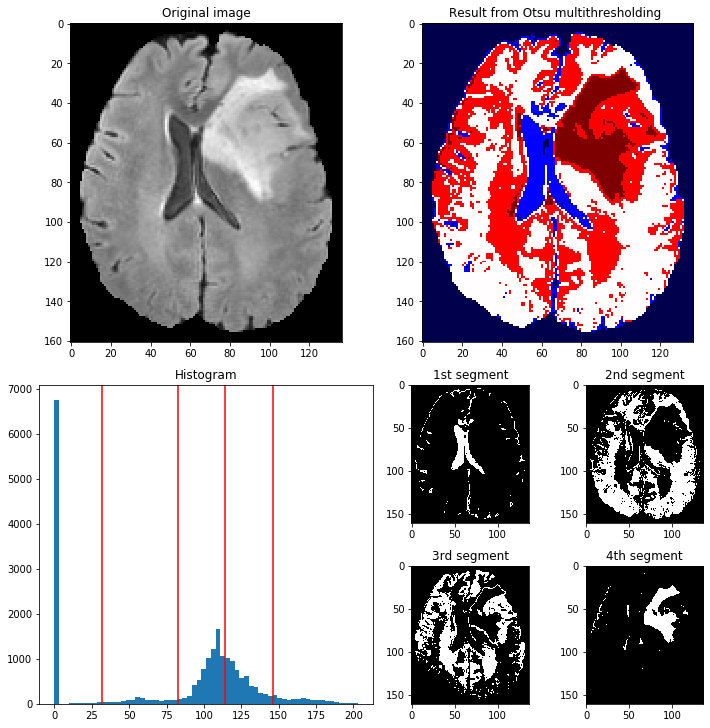

In [3]:
# EXERCISE 1.1 CODE

import SimpleITK as sitk
import numpy as np 
import matplotlib.pyplot as plt 
import skimage as sk

# read the images
path_to_image = './BraTS2021_01666/BraTS2021_01666_flair.mha'
MRI_image = sitk.ReadImage (path_to_image)
# image_array = sitk.GetArrayFromImage(image) # should convert to array
# show_image(MRI_image)

# read ground truth in uint8 format
path_to_image= './BraTS2021_01666/BraTS2021_01666_seg.mha'
ground_truth = sitk.ReadImage (path_to_image, outputPixelType=sitk.sitkUInt8)
# show_image(ground_truth)

# Create a function that performs the Otsu multi-thresholding

def otsu_threshold(image, n_bins=64, n_threshold=4):
    otsu_object = sitk.OtsuMultipleThresholdsImageFilter()
    otsu_object.SetNumberOfHistogramBins(n_bins)
    otsu_object.SetNumberOfThresholds(n_threshold)
    image_segments = otsu_object.Execute(image)
    threshold_values = otsu_object.GetThresholds()
    return image_segments, threshold_values

image_segments, thresholds = otsu_threshold(MRI_image)
show_segments(MRI_image, image_segments, thresholds)

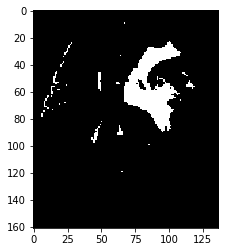

2
Show the tumor component (ex 1.1 no postprocessing):


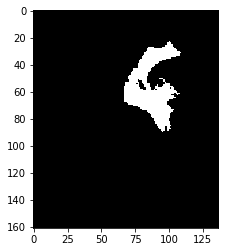

In [4]:
# Select the segment where the tumor is present
segments_array = sitk.GetArrayFromImage(image_segments)
tumor_segment = sitk.GetImageFromArray(1*(segments_array==4)) # covert from array to sitk format
show_image(tumor_segment)

# Search for the component with the highest number of pixels

def max_pixel_component(image):
    connected_object = sitk.ConnectedComponentImageFilter()
    connected_object.SetFullyConnected(True)
    # returns a image labeled with connected components
    labeled_image = connected_object.Execute(image)
    shape_stats_object = sitk.LabelShapeStatisticsImageFilter()
    # computes the shape attributes from a labeled image
    shape_stats_object.Execute(labeled_image)
    n_labels = shape_stats_object.GetNumberOfLabels()
    # print('number of labels is', n_labels) # 29 components
    labels = shape_stats_object.GetLabels()
    n_pixels = []
    for label in labels:
        pixels = shape_stats_object.GetNumberOfPixels(label)
        n_pixels.append(pixels)
    # print('number of pixels in each component:', n_pixels) 
    # does not retrieve the background!!
    # background_pixels = max(n_pixels)
    # background_index = n_pixels.index(background_pixels)
    # n_pixels[background_index] = 0
    tumor_pixels = max(n_pixels)
    tumor_label = n_pixels.index(tumor_pixels)+1
    print(tumor_label)
    labeled_image_array = sitk.GetArrayFromImage(labeled_image)
    tumor_component = sitk.GetImageFromArray(1*(labeled_image_array==tumor_label)) # covert from array to sitk format
    return tumor_component

tumor_component = max_pixel_component(tumor_segment)
print('Show the tumor component (ex 1.1 no postprocessing):')
show_image(tumor_component)

Show the tumor component (ex 1.1 with postprocessing):


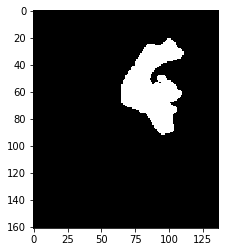

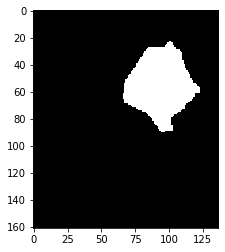

In [5]:
# 1.4: POSTPROCESSING OF THE SEGMENTED SHAPE
def postprocessing(tumor):
    filter1 = sitk.BinaryFillholeImageFilter()
    filter1.SetForegroundValue(1)
    tumor = filter1.Execute(tumor) # Remove holes not connected to the boundary of the image
    filter2 = sitk.BinaryDilateImageFilter()
    filter2.SetForegroundValue(1)
    filter2.SetKernelRadius(2)
    filter2.SetKernelType(sitk.sitkBall)
    tumor = filter2.Execute(tumor) # Fast binary dilation of a single intensity value in the image
    return tumor
tumor_post = postprocessing(tumor_component)
print('Show the tumor component (ex 1.1 with postprocessing):')
show_image(tumor_post)
tumor_post.CopyInformation(ground_truth)
# show_image(tumor_post) # the same, I copied only info about spacing
show_image(ground_truth)

In [6]:
# 1.5: EVALUATION
def evaluate(tumor, ground_truth):
    # the two images must be in sitk format with same spacing info
    
    tumor = sitk.Cast(tumor, sitk.sitkUInt8) # change image pixel type
    # print(tumor.GetPixelIDTypeAsString())
    # print(ground_truth.GetPixelIDTypeAsString())
    # print(ground_truth.GetSize())
    filter1 = sitk.LabelOverlapMeasuresImageFilter()
    filter1.Execute(tumor, ground_truth) # Computes overlap measures between the set same set of labels of pixels of two images.
    # Background is assumed to be 0.
    dice = filter1.GetDiceCoefficient()
    jaccard = filter1.GetJaccardCoefficient()
    f_p = filter1.GetFalsePositiveError()
    f_n = filter1.GetFalseNegativeError()
    filter2 = sitk.HausdorffDistanceImageFilter()
    filter2.Execute(tumor, ground_truth)
    haus = filter2.GetHausdorffDistance()
    return dice, jaccard, f_p, f_n, haus
dice1, jaccard1, f_p1, f_n1, haus1 = evaluate(tumor_post, ground_truth)

# evaluation of the segmentation obtained from outsu applied to the original MRI image
    

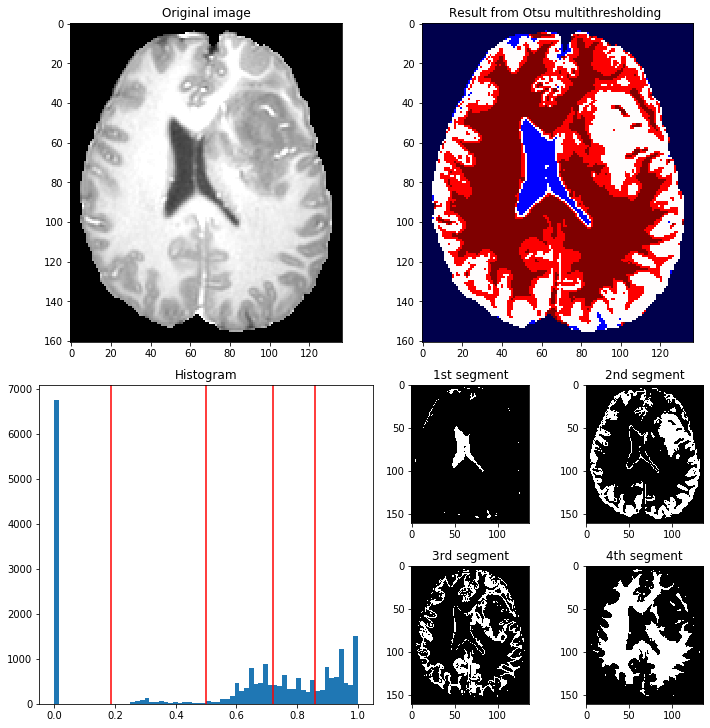

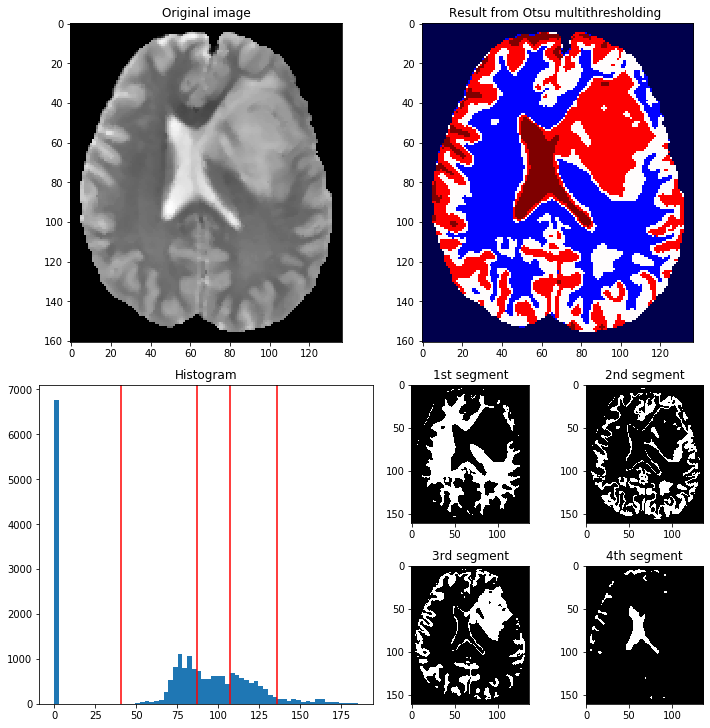

In [7]:
# EXERCISE 1.2 CODE
# 1.2.1
# Read the images you got from exercise 1 (linear stretching) and exercise 2 (denoised)

import SimpleITK as sitk
import numpy as np 
import matplotlib.pyplot as plt 
import skimage as sk

path_to_image = './Previous_session/stretched.mha'
image_stretched = sitk.ReadImage (path_to_image)
# image_array = sitk.GetArrayFromImage(image) # should convert to array
# show_image(MRI_image)

path_to_image= './Previous_session/median_filtered.mha'
image_median = sitk.ReadImage (path_to_image)
# show_image(ground_truth)

#1.2.2
# Apply the Otsu multi-thresholding algorithm to the new images.
# Visualize the results using show_segments
image_stretched_segments, thresholds1 = otsu_threshold(image_stretched)
image_median_segments, thresholds2 = otsu_threshold(image_median)
show_segments(image_stretched, image_stretched_segments, thresholds1)
show_segments(image_median, image_median_segments, thresholds2)

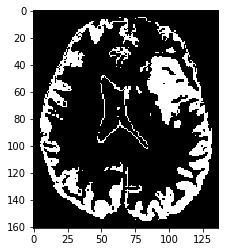

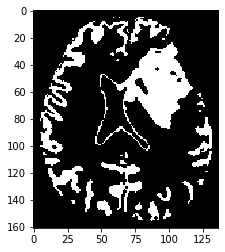

11
Show the tumor max pixel component (stretched) :


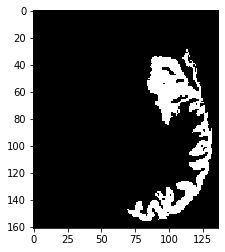

8
Show the tumor max pixel component (median):


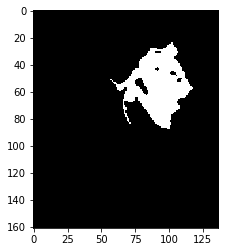

In [8]:
# 1.2.3
# In each case select the segment where the tumor is distinguishable and extract it using the function of point 3 of the previous exercise. 
# It is possible that in the selected segment the tumor is connected to other structures.

# Select the segment where the tumor is present for the stretched image
stretched_segments_array = sitk.GetArrayFromImage(image_stretched_segments)
tumor_segment_stretched = sitk.GetImageFromArray(1*(stretched_segments_array==2)) # covert from array to sitk format
show_image(tumor_segment_stretched)

# Select the segment where the tumor is present for the median image
median_segments_array = sitk.GetArrayFromImage(image_median_segments)
tumor_segment_median = sitk.GetImageFromArray(1*(median_segments_array==3)) # covert from array to sitk format
show_image(tumor_segment_median)

tumor_component_stretched = max_pixel_component(tumor_segment_stretched)
print('Show the tumor max pixel component (stretched) :')
show_image(tumor_component_stretched)

tumor_component_median = max_pixel_component(tumor_segment_median)
print('Show the tumor max pixel component (median):')
show_image(tumor_component_median)


(161, 137)
(161, 137)
(161, 137)


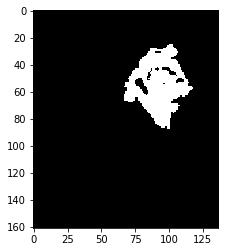

In [9]:
# 1.2.4

# all the images are in sitk format
image1 = sitk.GetArrayFromImage(tumor_component) # image with no postprocessing from previous ex
image2 = sitk.GetArrayFromImage(tumor_component_stretched)
image3 = sitk.GetArrayFromImage(tumor_component_median)

print(image1.shape)
print(image2.shape)
print(image3.shape)
# shapes correspond
# implement majority voting function
def maj_voting(image1, image2, image3):
    n,m = image1.shape
    image_voted = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            avg = (image1[i,j]+image2[i,j]+image3[i,j])/3
            if avg > 0.5:
                image_voted[i,j] = 1
            else:
                image_voted[i,j] = 0
    return image_voted

tumor_maj = sitk.GetImageFromArray(maj_voting(image1, image2, image3))
tumor_maj.CopyInformation(ground_truth)

show_image(tumor_maj)

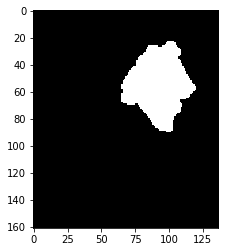

In [10]:
# 1.2.5
# POSTPROCESSING: apply filters of previous ex

tumor_maj_post = sitk.Cast(tumor_maj, sitk.sitkUInt8)
tumor_maj_post = postprocessing(tumor_maj_post)
tumor_maj_post.CopyInformation(ground_truth)
show_image(tumor_maj_post)

In [11]:
# 1.2.6
# Calculate the metrics (DICE coefficient, Jaccard coefficient, false positive error, false negative error 
# and Hausdorff distance) between the ground truth and the images from point 4 (majority no postprocessing) 
# and 5 (majority and postprocessing)
dice2, jaccard2, f_p2, f_n2, haus2 = evaluate(tumor_maj, ground_truth)
dice3, jaccard3, f_p3, f_n3, haus3 = evaluate(tumor_maj_post, ground_truth)

print('Metrics simple Oysu segmentation (with postprocessing)', dice1, jaccard1, f_p1, f_n1, haus1)
print('Metrics maj voting segmentation (no postprocessing)', dice2, jaccard2, f_p2, f_n2, haus2)
print('Metrics maj voting segmentation (with postprocessing)', dice3, jaccard3, f_p3, f_n3, haus3)

Metrics simple Oysu segmentation (with postprocessing) 0.801378291902535 0.6685831622176591 0.11425462459194777 0.26831460674157304 13.45362404707371
Metrics maj voting segmentation (no postprocessing) 0.8426527958387517 0.7280898876404495 0.0 0.27191011235955054 5.830951894845301
Metrics maj voting segmentation (with postprocessing) 0.9453971119133574 0.8964484381685922 0.050747621205256006 0.058426966292134834 3.605551275463989


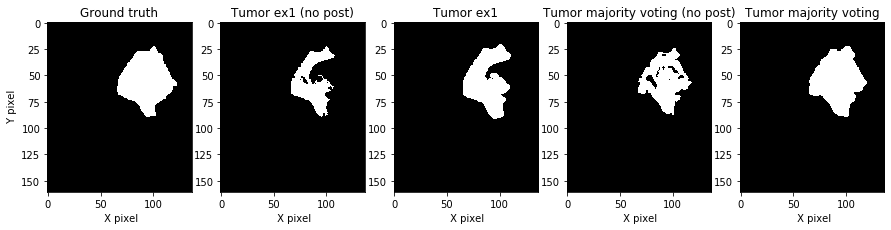

In [12]:
# plot the 1x5 images:
'''- Plot a one-by-five image comparison of the ground truth and the four tumor segmentations: 
(1) Exercise 1.1 no post-processing, (2) Exercise 1.1 post-processing, (3) Exercise 1.2 majority 
voting no post-processing and (4) Exercise 1.2 majority voting post-processing.
- Plot the results of each of the evaluation metric for different methods using a ```matplotlib``` barplot.
- Discuss your results. '''
fig, [ax1, ax2, ax3, ax4, ax5]= plt.subplots (1, 5, figsize= (15,10))

im1= ax1.imshow (sitk.GetArrayFromImage(ground_truth), cmap=plt.cm.Greys_r)
ax1.set_xlabel(" X pixel")
ax1.set_ylabel(" Y pixel")
ax1.set_title('Ground truth')

im2= ax2.imshow (sitk.GetArrayFromImage(tumor_component), cmap=plt.cm.Greys_r)
ax2.set_xlabel(" X pixel")
ax2.set_ylabel(" Y pixel")
ax2.set_title('Tumor ex1 (no post)')

im3= ax3.imshow (sitk.GetArrayFromImage(tumor_post), cmap=plt.cm.Greys_r)
ax3.set_xlabel(" X pixel")
ax3.set_ylabel(" Y pixel")
ax3.set_title('Tumor ex1')

im4= ax4.imshow (sitk.GetArrayFromImage(tumor_maj), cmap=plt.cm.Greys_r)
ax4.set_xlabel(" X pixel")
ax4.set_ylabel(" Y pixel")
ax4.set_title('Tumor majority voting (no post)')

im5= ax5.imshow (sitk.GetArrayFromImage(tumor_maj_post), cmap=plt.cm.Greys_r)
ax5.set_xlabel(" X pixel")
ax5.set_ylabel(" Y pixel")
ax5.set_title('Tumor majority voting')

plt.show()

index 1 refers to the Otsu segmentation obtained from the original image with postprocessing 

index 2 refers to the Otsu segmentation obtained from the major voting approach image with no postprocessing 

index 3 refers to the Otsu segmentation obtained from the major voting approach image with postprocessing


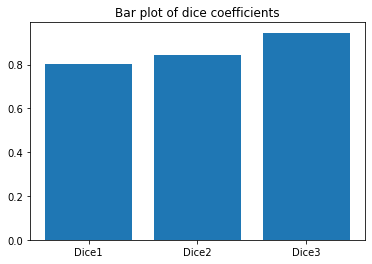

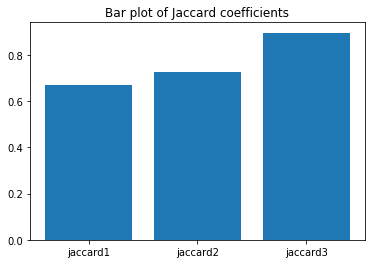

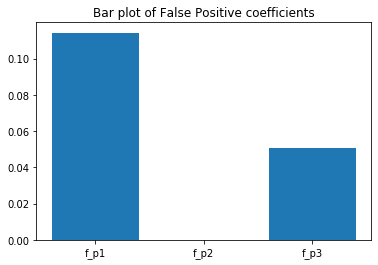

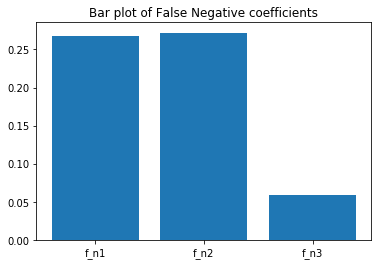

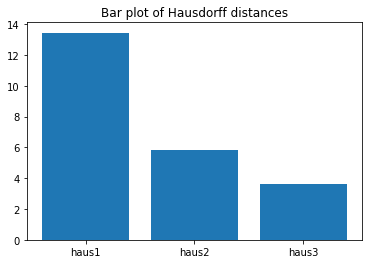

In [13]:
# Plot the results of each of the evaluation metric for different methods using a matplotlib barplot
dice2, jaccard2, f_p2, f_n2, haus2

print('index 1 refers to the Otsu segmentation obtained from the original image with postprocessing \n') 
print('index 2 refers to the Otsu segmentation obtained from the major voting approach image with no postprocessing \n')
print('index 3 refers to the Otsu segmentation obtained from the major voting approach image with postprocessing')
x = [1,2,3]
y = [dice1, dice2, dice3]
plt.bar(x, y, tick_label=('Dice1','Dice2','Dice3'))
plt.title('Bar plot of dice coefficients')
plt.show()

y = [jaccard1, jaccard2, jaccard3]
plt.bar(x, y, tick_label=('jaccard1','jaccard2','jaccard3'))
plt.title('Bar plot of Jaccard coefficients')
plt.show()

y = [f_p1, f_p2, f_p3]
plt.bar(x, y, tick_label=('f_p1','f_p2','f_p3'))
plt.title('Bar plot of False Positive coefficients')
plt.show()

y = [f_n1, f_n2, f_n3]
plt.bar(x, y, tick_label=('f_n1','f_n2','f_n3'))
plt.title('Bar plot of False Negative coefficients')
plt.show()

y = [haus1, haus2, haus3]
plt.bar(x, y, tick_label=('haus1','haus2','haus3'))
plt.title('Bar plot of Hausdorff distances')
plt.show()



## EXERCISE 1 ANSWER

From the 5 figures and the barplots we see clearly that the tumor region segmented after postprocessing the segmentation obtained through the majority voting Otsu algorithm approach between the original image, the linear enhanced ('stretched') image and the image with noise removed using the median filter is the one closest to the true tumor region. Indeed its similarity metrics (Dice, Jaccard) are the highest, while the dissimilarity metrics (False Positive, False negative percentages and Hausdorff distance) are the lowest (exept in case of False Positive in the no postprocessing case which is zero, meaning that the region segmented is entirely contained in the ground truth).
There are two factors which contribute to this result:
- the preprocessing steps help the Otsu algorithm to better separate the tumor and the majority voting helps not to correct possible artifacts;
- the two postprocessing operators (the first fills the background holes inside the segmented shape and the second is a morphological binary dilation), help to have a smoother image and compensate the errors of Otsu algorithm by taking a more plausible shape.

## 1.2 Region growing

Region growing algorithms start by defining an initial region, known as seed point, usually set by a user inside the object to be segmented. Afterwards, an iterative search is performed. In each iteration all neighboring pixels of the seed are evaluated and a criterion is used to determine if they should also be considered part of the object. If so, they are added to the region and their neighbors will now also be evaluated in the following iteration.

The criterion to add neighbours varies between applications, these could be brightness, color, texture, gradient, or geometric properties. The most common approach is to take into account the intensity of the neighoring pixels. If their intensity is between a lower and upper threshold values, they are included within the region. The algorithm has the benefit of taking into account spatial connectivity, thereby enabling to limit the segmentation to connected regions.

<img src="./images/region_growing.png" alt="drawing" width="800"/>

**(i)** Angio-MRI with seed point at the aortic arch **(ii) - (v)** Region growing from the seed point.

## Exercise 2.1 

From previous exercise you noticed that it was not possible to directly separate the tumor from other structures, hence the need to isolate it using sitk.ConnectedComponentImageFilter(). Additionally, extra information from other modalities was required. In this exercise you will attempt to isolate the tumor by implementing a region growing algorithm in its simplest form.

The algorithm should output a binary image with pixel values equal to 1 for the structure under study and 0 for all other pixels. As inputs it should use a seed point and two threshold values (lower and uppper). 

1. Start by reading the image 'BraTS2021_01666_flair.mha' and the ground-truth segmentation 'BraTS2021_01666_seg.mha' from the folder 'BraTS2021_01666', read the ground truth as 'sitk.sitkUInt8'.
2. Use the function ```set_seed_point()``` to visualize the image and select a seed point. Select a point in the center of the tumor.
3. Previous function returns the coordinates of the seed point. Get the pixel intensity at the seed point. 
4. Build a function that implements a region growing algorithm. It has to compare the intensity of the seed point with the neighboring intesities. If they are within the limits, these pixels are added to the region. Evaluate the performance of the algorithm if the following threshold values are taken into account:

    - Seed point intensity $\pm$10, $\pm$20 and $\pm$30. 

5. Assess its performance by considering 4 and 8 nearest neighbors. 

    **To build this function:**
    - Start from the seed point
    - List the 4 (or 8) neighboring pixels
    - Check if their intensity falls within the threshold boundaries. 
    - Grow your region by adding the pixels that meet the condition.
    - List all new neighboring pixels of the obtained new region.
    - Repeat until there are no more pixels added.
    
**Hint:** It may be handy to store the indexes (locations) and values of pixels which are already marked inside and those, which are currently marked as neighbors. For example: 0 - outside, 1 - inside, 2 - neighbor.

5. Apply ```sitk.BinaryFillholeImageFilter``` (```SetForegroundValue``` to 1) as post-processing to the resultant segmentations using the threshold of $\pm$30. 
6. Calculate the metrics (DICE coefficient, Jaccard coefficient, false positive error, false negative error and Hausdorff distance) between the ground truth and the obtained segmentations (8 in total: 3 thresholds x 2 neighbouring strategies, and 2 post-processed images).

**Reminder:** Be sure to have ```matplotlib == 3.1.3``` and ```Tkinter == 8.6```.

## Report
<font color=blue> 
- Plot a two-by-five image comparison of the ground truth and the tumor segmentations at each threshold level for each number of neighbors.
- Plot a relation (```plt.plot()```) between the number of thresholds used (x-axis) against the evaluated metric. On each figure include two plots, one for 4 neighbours and the other for 8 neighbours.
- Discuss your results.
- In the clinical practice, you are often faced with a trade-off between the false positive and false negative error of your segmentation (one is low, the other is high). In the case of brain tumour segmentation, would you prefer to obtain:
    - oversegmenated volume
    - undersegmented volume
    - Why? Which case corresponds to what values of false positive and false negative errors?
    
</font>

<font color=blue> Your answer here </font>

In [14]:
# ! pip3 install matplotlib==3.1.3

import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__version__)


# Function to show a new image which is in sitk format
def show_image(image):
    '''
    This function conver a sitk image, converts it to array and shows it
    Inputs:
        - image: Image in SimpleITK format that will be plot
    Outputs:
        - A new plot
    '''
    array = sitk.GetArrayFromImage(image)
    
    plt.imshow(array, cmap='gray')
    plt.show()
    

# Function to select a seed point from the image
def set_seed_point(image):
    '''
    This function opens a new window and displays the image, select a point inside the tumor to set the seed point.
    Inputs:
        - image: Image where the seed point will be set. Format sitk.
    Outputs:
        - seed: 'x' and 'y' coordinates of the seed point
    '''
    matplotlib.use('TkAgg')
    
    # Pass image to array
    array = sitk.GetArrayFromImage(image)
    
    # Select seed point
    plt.figure()
    plt.imshow(array, cmap = 'gray')
    plt.show(block=False)
    #User selects the intial seed point
    print ('\nPlease select the initial seed point')

    pseed = plt.ginput(1)
    x = int(pseed[0][0])
    y = int(pseed[0][1])
    seed = x, y

    print ('you clicked:',seed)

    # Close figure
    plt.close('all')
    
    return seed

3.1.3


The seed coordinates are: (90, 53)


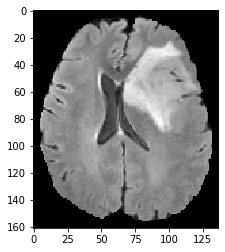

In [16]:
# !pip3 install tk
import tkinter as tk
import matplotlib
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np 
import skimage as sk

# 2.1
# read the images
path_to_image = './BraTS2021_01666/BraTS2021_01666_flair.mha'
MRI_image = sitk.ReadImage (path_to_image)
show_image(MRI_image)

# read ground truth in uint8 format
path_to_image= './BraTS2021_01666/BraTS2021_01666_seg.mha'
ground_truth = sitk.ReadImage (path_to_image, outputPixelType=sitk.sitkUInt8)
# show_image(ground_truth)

#2.2 select a seed
# seed = set_seed_point(MRI_image)
seed = (90,53)
print('The seed coordinates are:',seed)

pixel intensity of seed: 143
(90, 53)
58


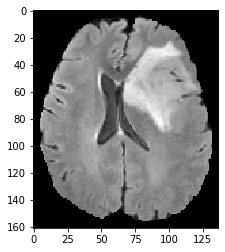

In [17]:
# 2.3 get the pixel intensity
print('pixel intensity of seed:', MRI_image[seed])
show_image(MRI_image)
print(seed)
image_array = sitk.GetArrayFromImage(MRI_image)
print(image_array[seed])

# when you change from sitk format to array the image is transposed!
seed = seed[::-1]

<font color=red> SOLUTION </font>

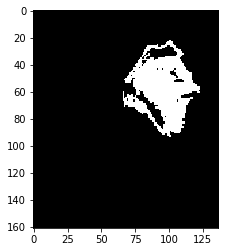

In [37]:
# 2.4 implement region growing
def region_growing(image, seed, threshold,  n=4):
    # n numeber of neighbors
    # image in array format
    intensity = image[seed]
    low = intensity-threshold
    up = intensity+threshold+1
    dim = image.shape
    # inizialize segmented image
    region = np.zeros(dim)
    region[seed] = 1
    neighbors = [seed] # works as a stack
    while len(neighbors)!=0:
        i,j = neighbors.pop(-1) # take the last element of the stack
        possible_neighbors = [] 
        for k in [-1,1]:
            possible_neighbors.append((i+k,j))
            possible_neighbors.append((i,j+k))
            if n==8:
                possible_neighbors.append((i+k,j+k))
                possible_neighbors.append((i+k,j-k))
        for neighbor in possible_neighbors: 
            if (region[neighbor]==0) and (image[neighbor] in range(low, up)):
                region[neighbor] = 1
                neighbors.append(neighbor) # if meet the conditions, add to the stack
    return region

region = region_growing(image_array, seed, n=4, threshold=30)
region = sitk.GetImageFromArray(region)
show_image(region)

In [50]:
# 2.5/2.6

def postprocessing1(tumor): # only fillhole filter
    tumor = sitk.Cast(tumor, sitk.sitkUInt8)
    filter1 = sitk.BinaryFillholeImageFilter()
    filter1.SetForegroundValue(1)
    tumor = filter1.Execute(tumor) # Remove holes not connected to the boundary of the image
    return tumor

Dice = []
Jaccard = []
F_p = []
F_n = []
Haus = []
images = []

# fist 6 images

for threshold in [10, 20 ,30]:
    for n in [4,8]:
        region = region_growing(image_array, seed, threshold,  n)
        images.append(region) # save the images in a list to plot them later
        region = sitk.GetImageFromArray(region)
        region.CopyInformation(ground_truth) # copy spacing info to evealuate
        dice, jaccard, f_p, f_n, haus = evaluate(region, ground_truth)
        Dice.append(dice)
        Jaccard.append(jaccard)
        F_p.append(f_p)
        F_n.append(f_n)
        Haus.append(haus)
        
# for threshold=30 do also postprocessing

for i in [4,5]: # the two indexes correspond to threshold 30 using 4 and 8 neighbors
    region = postprocessing1(sitk.GetImageFromArray(images[i]))
    region.CopyInformation(ground_truth)
    dice, jaccard, f_p, f_n, haus = evaluate(region, ground_truth)
    region = sitk.GetArrayFromImage(region)
    images.append(region) 
    Dice.append(dice)
    Jaccard.append(jaccard)
    F_p.append(f_p)
    F_n.append(f_n)
    Haus.append(haus)
 

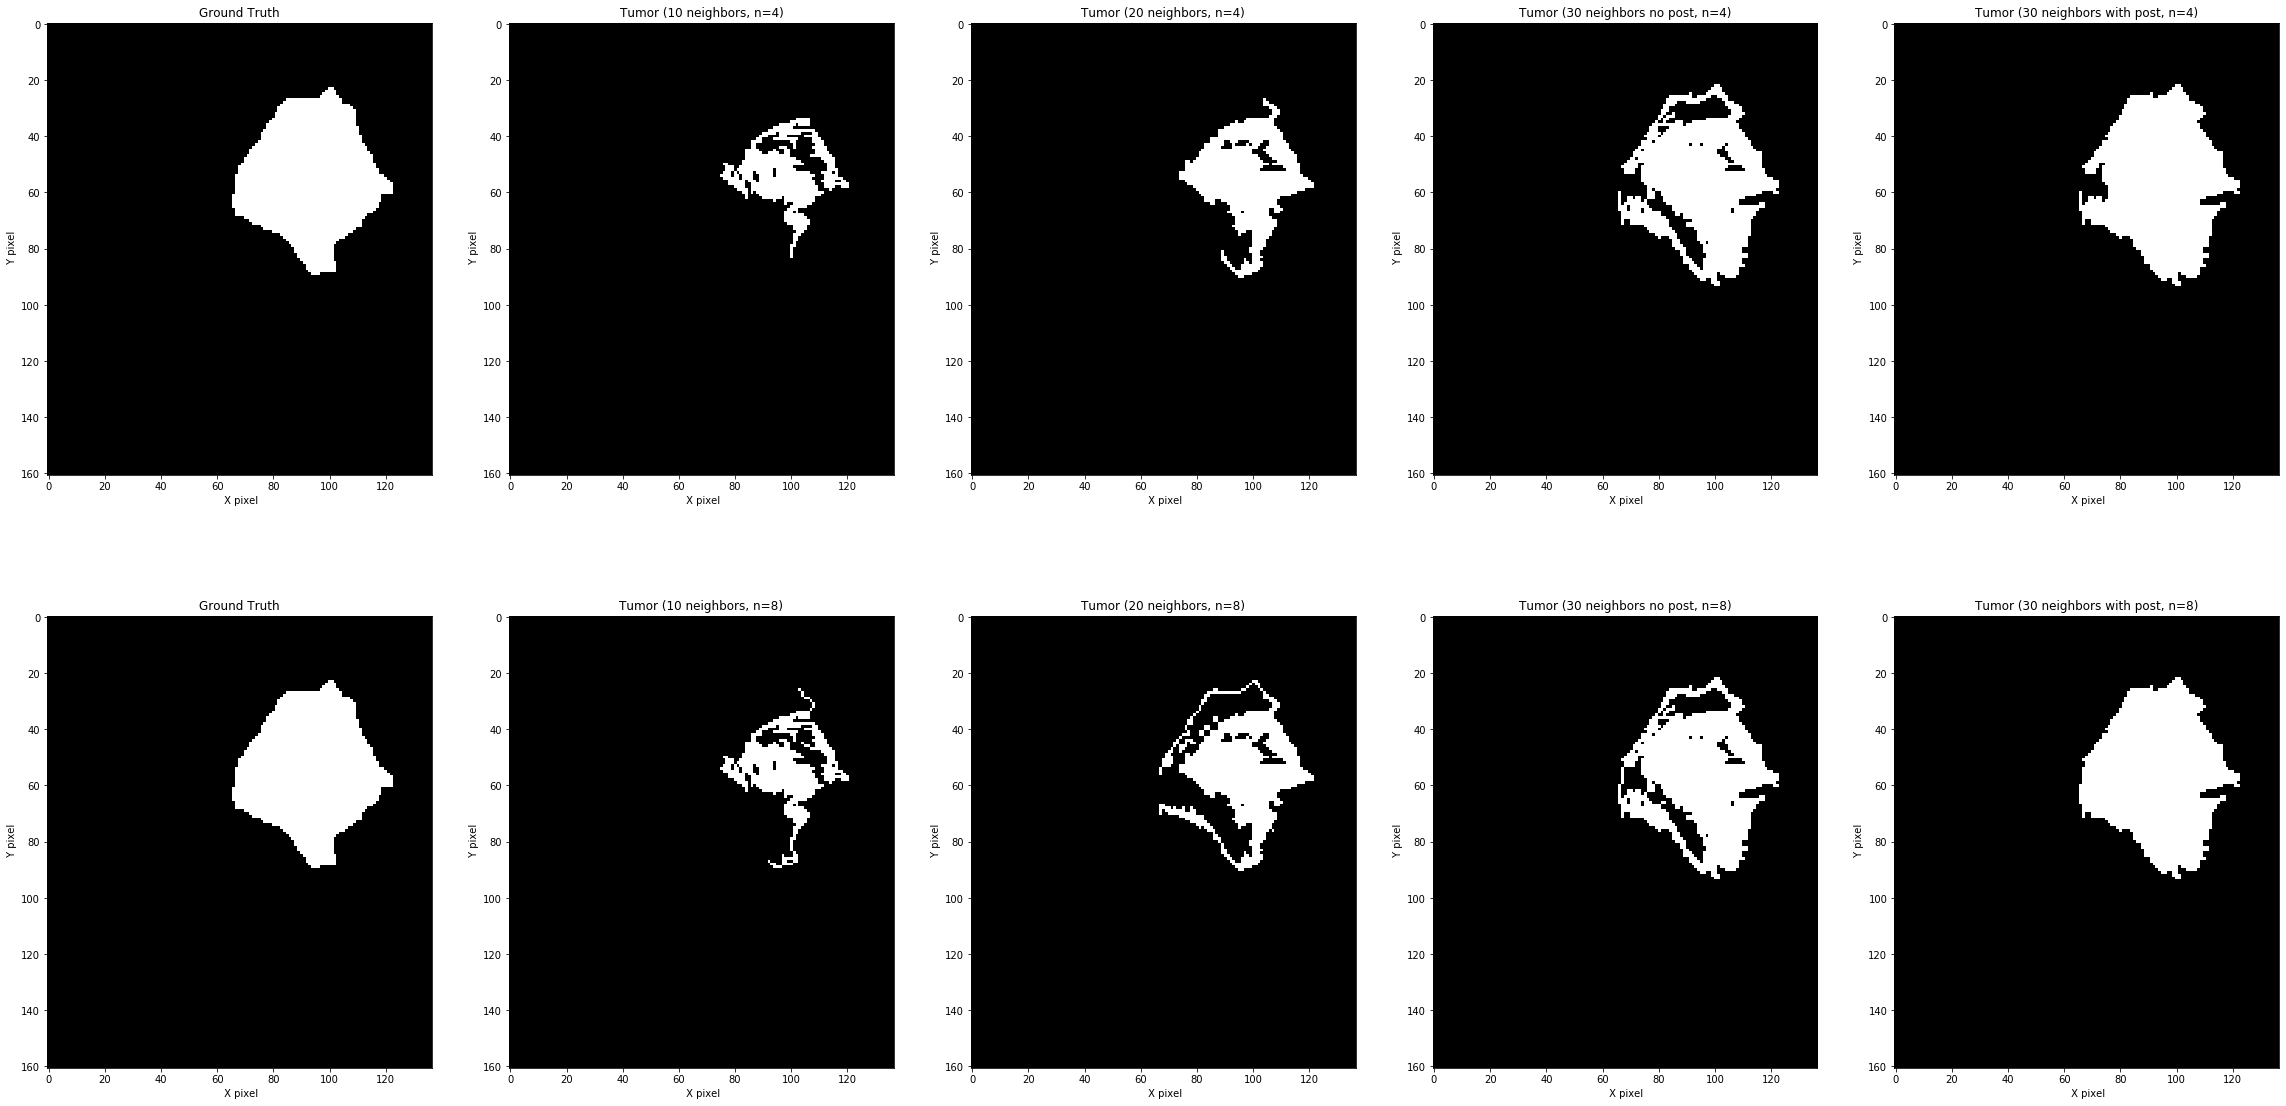

In [60]:
# plot all the regions and compare with ground truth

fig, [[ax1, ax2, ax3, ax4, ax5], [ax6, ax7, ax8, ax9, ax10]]= plt.subplots (2, 5, figsize= (40,20))

im1= ax1.imshow (sitk.GetArrayFromImage(ground_truth), cmap=plt.cm.Greys_r)
ax1.set_xlabel(" X pixel")
ax1.set_ylabel(" Y pixel")
ax1.set_title('Ground Truth')

im6= ax6.imshow (sitk.GetArrayFromImage(ground_truth), cmap=plt.cm.Greys_r)
ax6.set_xlabel(" X pixel")
ax6.set_ylabel(" Y pixel")
ax6.set_title('Ground Truth')

im5= ax5.imshow (images[6], cmap=plt.cm.Greys_r)
ax5.set_xlabel(" X pixel")
ax5.set_ylabel(" Y pixel")
ax5.set_title('Tumor (30 neighbors with post, n=4)')

im9= ax9.imshow (images[5], cmap=plt.cm.Greys_r)
ax9.set_xlabel(" X pixel")
ax9.set_ylabel(" Y pixel")
ax9.set_title('Tumor (30 neighbors no post, n=8)')

im2= ax2.imshow (images[0], cmap=plt.cm.Greys_r)
ax2.set_xlabel(" X pixel")
ax2.set_ylabel(" Y pixel")
ax2.set_title('Tumor (10 neighbors, n=4)')


im10= ax10.imshow (images[7], cmap=plt.cm.Greys_r)
ax10.set_xlabel(" X pixel")
ax10.set_ylabel(" Y pixel")
ax10.set_title('Tumor (30 neighbors with post, n=8)')

im3= ax3.imshow (images[2], cmap=plt.cm.Greys_r)
ax3.set_xlabel(" X pixel")
ax3.set_ylabel(" Y pixel")
ax3.set_title('Tumor (20 neighbors, n=4)')

im7= ax7.imshow (images[1], cmap=plt.cm.Greys_r)
ax7.set_xlabel(" X pixel")
ax7.set_ylabel(" Y pixel")
ax7.set_title('Tumor (10 neighbors, n=8)')

im4= ax4.imshow (images[4], cmap=plt.cm.Greys_r)
ax4.set_xlabel(" X pixel")
ax4.set_ylabel(" Y pixel")
ax4.set_title('Tumor (30 neighbors no post, n=4)')

im8= ax8.imshow (images[3], cmap=plt.cm.Greys_r)
ax8.set_xlabel(" X pixel")
ax8.set_ylabel(" Y pixel")
ax8.set_title('Tumor (20 neighbors, n=8)')


plt.show()

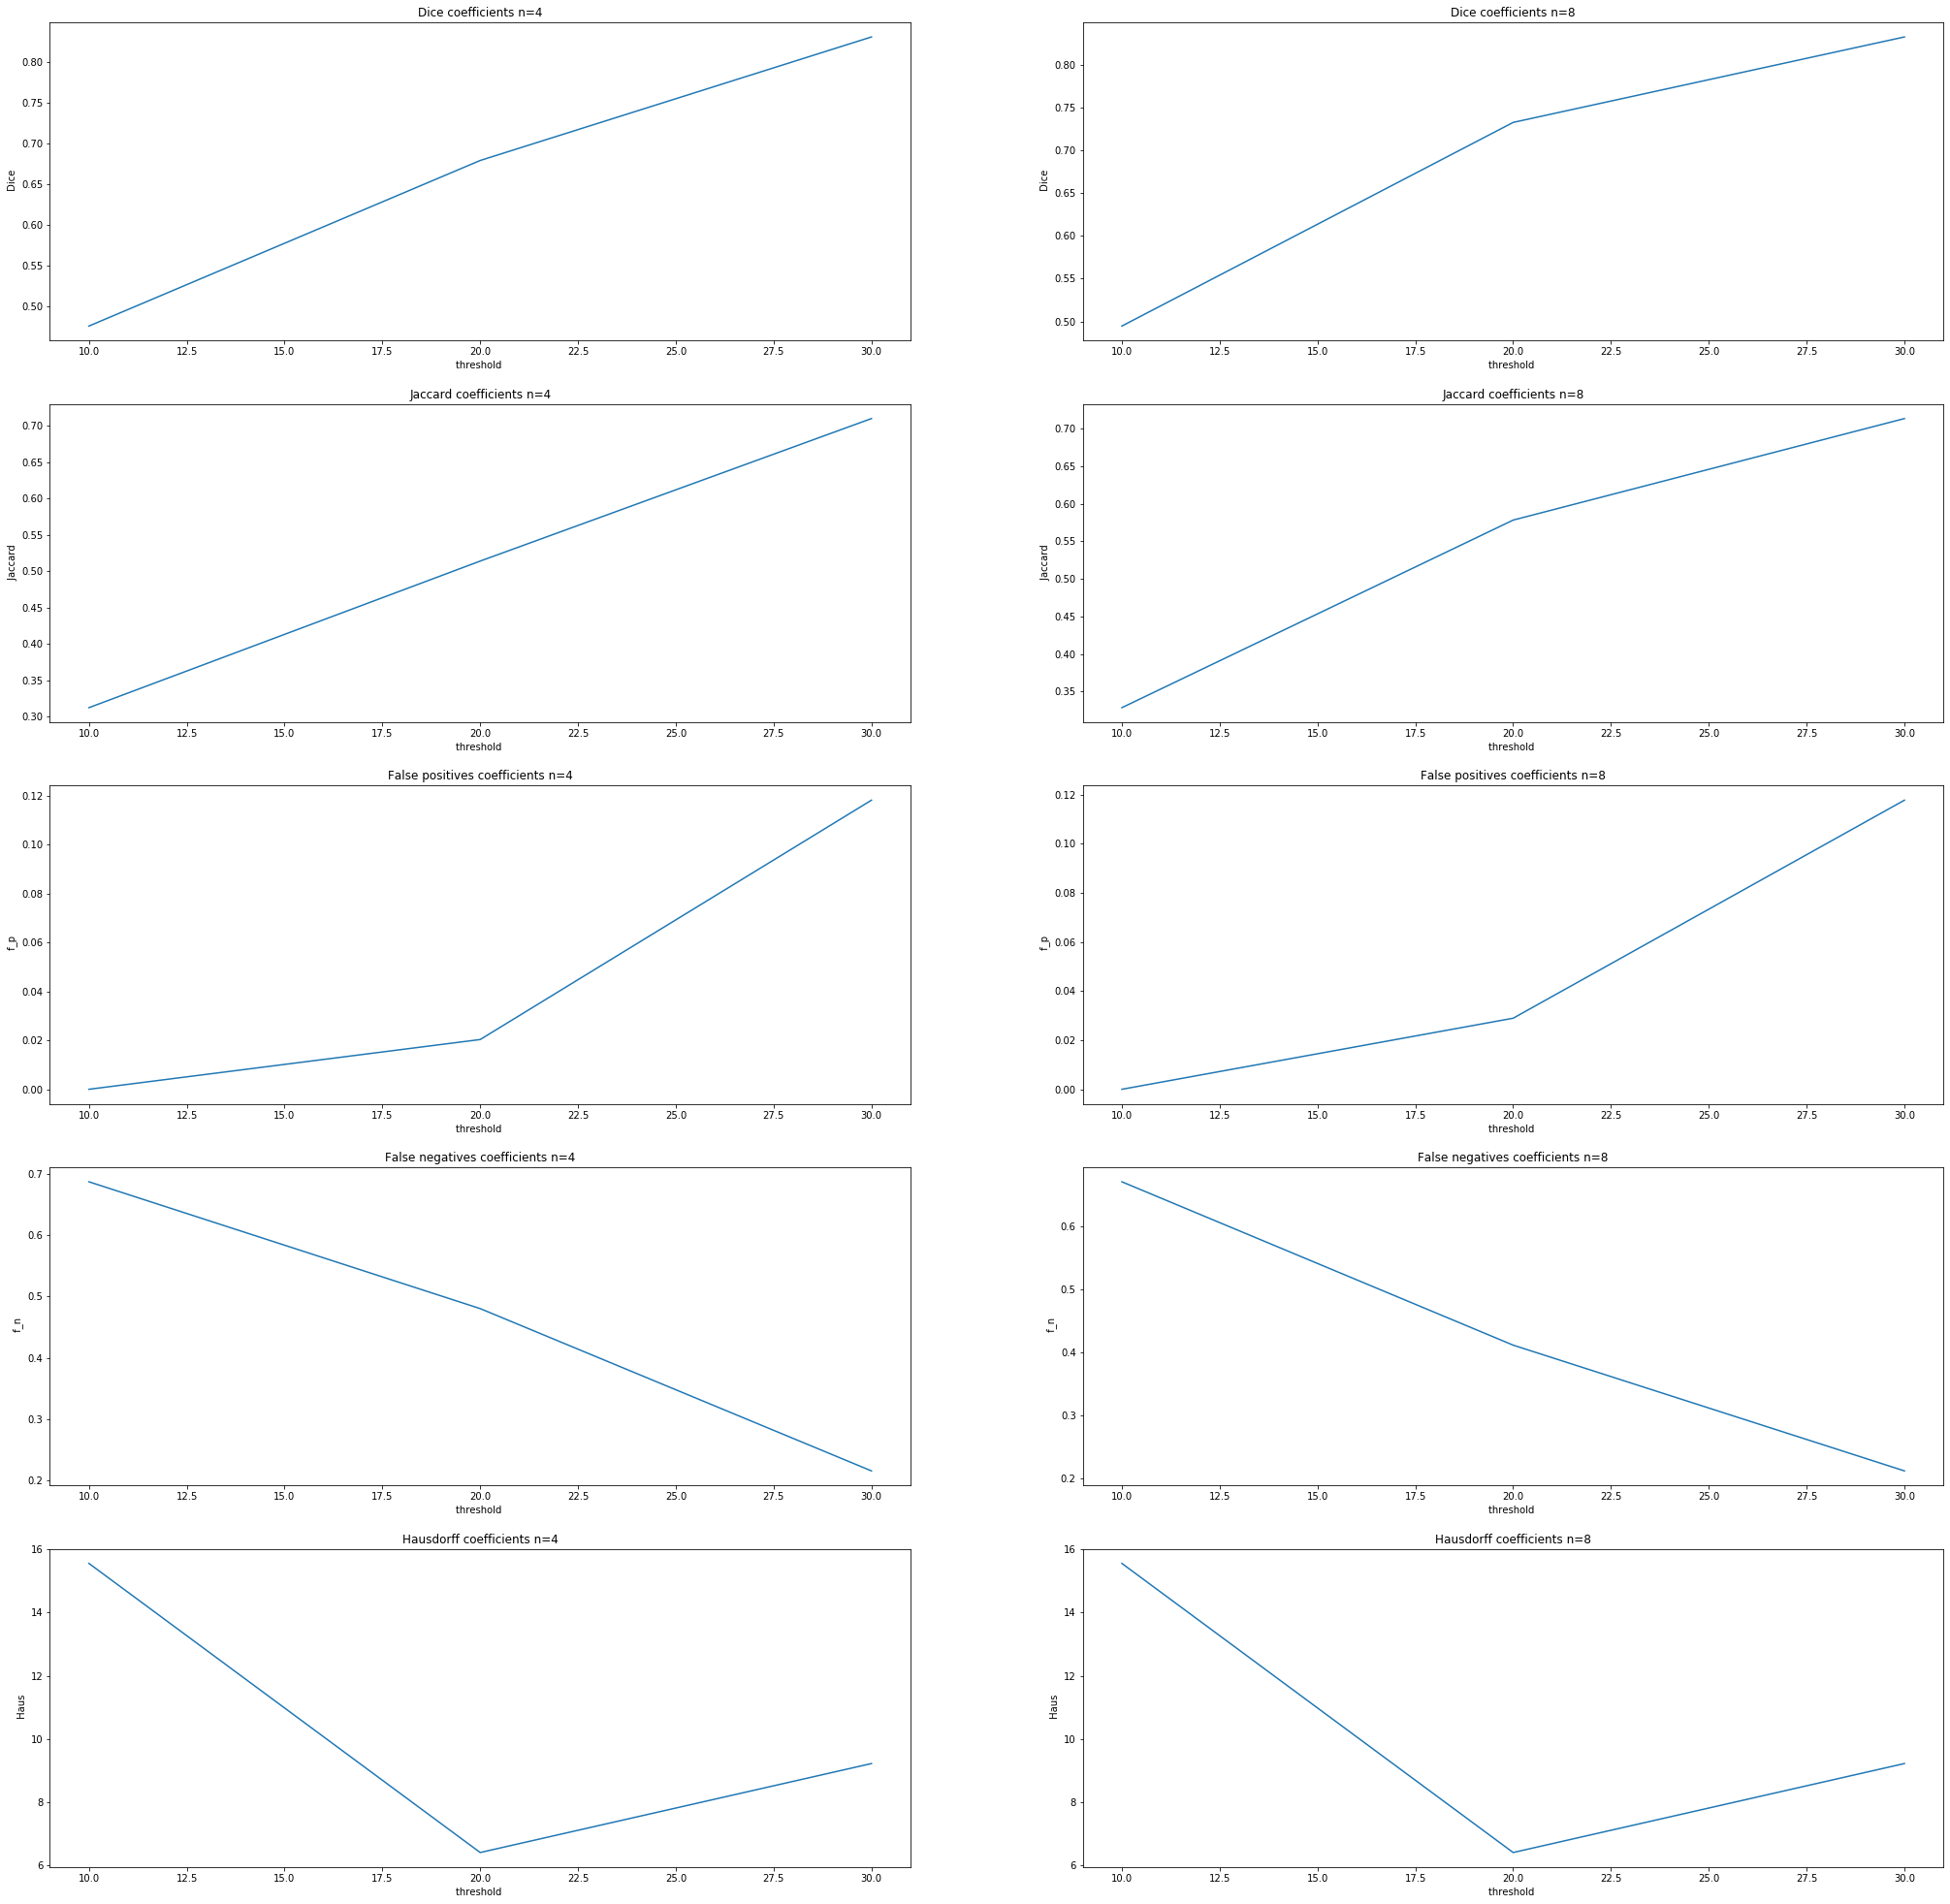

In [40]:
# do not consider postprocessing of tumors obtained from threshold=30

x = [10, 20 ,30] # thresholds

fig, [[ax1, ax2], [ax3, ax4], [ax5,ax6], [ax7,ax8], [ax9,ax10]]= plt.subplots (6, 2, figsize= (35,35))

ax1.plot(x, np.array(Dice)[[0,2,4]])
ax1.set_xlabel("threshold ")
ax1.set_ylabel(" Dice")
ax1.set_title('Dice coefficients n=4')

ax3.plot(x, np.array(Jaccard)[[0,2,4]])
ax3.set_xlabel("threshold ")
ax3.set_ylabel(" Jaccard")
ax3.set_title('Jaccard coefficients n=4')

ax5.plot(x, np.array(F_p)[[0,2,4]])
ax5.set_xlabel("threshold ")
ax5.set_ylabel(" f_p")
ax5.set_title('False positives coefficients n=4')

ax7.plot(x, np.array(F_n)[[0,2,4]])
ax7.set_xlabel("threshold ")
ax7.set_ylabel(" f_n")
ax7.set_title('False negatives coefficients n=4')

ax9.plot(x, np.array(Haus)[[1,3,5]])
ax9.set_xlabel("threshold ")
ax9.set_ylabel(" Haus")
ax9.set_title('Hausdorff coefficients n=4')

ax2.plot(x, np.array(Dice)[[1,3,5]])
ax2.set_xlabel("threshold ")
ax2.set_ylabel(" Dice")
ax2.set_title('Dice coefficients n=8')

ax4.plot(x, np.array(Jaccard)[[1,3,5]])
ax4.set_xlabel("threshold ")
ax4.set_ylabel(" Jaccard")
ax4.set_title('Jaccard coefficients n=8')

ax6.plot(x, np.array(F_p)[[1,3,5]])
ax6.set_xlabel("threshold ")
ax6.set_ylabel(" f_p")
ax6.set_title('False positives coefficients n=8')

ax8.plot(x, np.array(F_n)[[1,3,5]])
ax8.set_xlabel("threshold ")
ax8.set_ylabel(" f_n")
ax8.set_title('False negatives coefficients n=8')

ax10.plot(x, np.array(Haus)[[1,3,5]])
ax10.set_xlabel("threshold ")
ax10.set_ylabel(" Haus")
ax10.set_title('Hausdorff coefficients n=8')

plt.show()



## EXERCISE 2 ANSWER

Comments for the error plots:
- By taking a higher threshold, the Dice and the Jaccard similarity coefficient indicate a consistent improvement. Same for the false negative percentage, meaning that more pixels of tumor are included. The false positive instead grows as the threshold increases: we are taking more pixels which are not of the tumor! Since we take more points outside the tumore, not surprisingly the haurdorff distance (as defined in https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1HausdorffDistanceImageFilter.html) increases.

The images confirm the error values. 


In clinical practice I would prefer to have an oversegmented tumor (large false positive percentage) in order to have a better view of the whole tumor area.